# Test Fish Anabolism #

Primarily used for debugging and making sure module runs fine on its own.

In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

In [2]:
a = Aquaponics('anabolism', kswitch=100)
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4
m.options.SOLVER = 3

a.solve(disp=False, imode=7)

Text(0.5,0,'Time (days)')

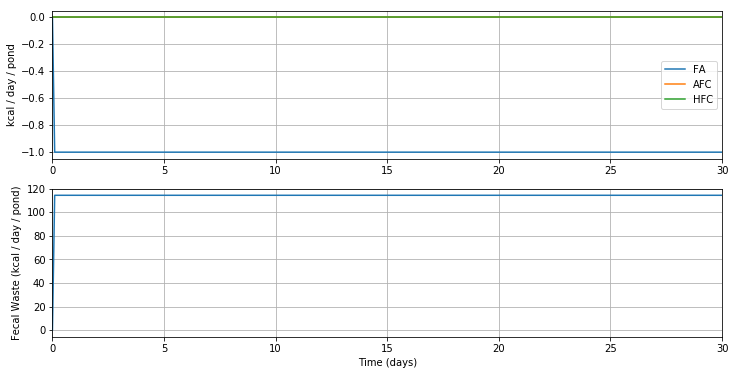

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title('Fish Anabolism')
ax = plt.subplot(211)
plt.plot(m.time, a.FA, label='FA')
plt.plot(m.time, a.AFC, label='AFC')
plt.plot(m.time, a.HFC, label='HFC')
plt.grid()
plt.ylabel('kcal / day / pond')
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.FW)
plt.grid()
plt.ylabel('Fecal Waste (kcal / day / pond)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')